<a href="https://colab.research.google.com/github/aasthadawar02/TME_6015/blob/main/Assignment2_TensorFlow_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Importing required libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import PIL.Image as Image
import tensorflow_datasets as tfds
import pandas as pd

**Loading Datasets from TensorFlow Libraries**

In [2]:
(training_set, validation_set), dataset_info = tfds.load(
    'rock_paper_scissors',
    split=['train[:70%]', 'train[70%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/2520 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteH66DSZ/rock_paper_scissors-train.tfrec…

Generating test examples...:   0%|          | 0/372 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/3.0.0.incompleteH66DSZ/rock_paper_scissors-test.tfreco…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [3]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    full_name='rock_paper_scissors/3.0.0',
    description="""
    Images of hands playing rock, paper, scissor game.
    """,
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    data_dir=PosixGPath('/tmp/tmp4o9b8o24tfds'),
    file_format=tfrecord,
    download_size=219.53 MiB,
    dataset_size=219.23 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=372, num_shards=1>,
        'train': <SplitInfo num_examples=2520, num_shards=2>,
    },
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
)

In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [5]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(300, 300, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
dataset_info.features['label']

ClassLabel(shape=(), dtype=int64, num_classes=3)

In [7]:
dataset_info.features['label'].num_classes

3

In [8]:
num_classes = dataset_info.features['label'].num_classes

In [9]:
num_training_examples = 0
num_validation_examples = 0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {} \n'.format(num_validation_examples))

Total Number of Classes: 3
Total Number of Training Images: 1764
Total Number of Validation Images: 756 



In [10]:
dataset_info.features['label'].names

['rock', 'paper', 'scissors']

In [11]:
def format_image(image, label):
    image = tf.image.resize(image, (128, 128))/255.0
    return image, label
train_batches = training_set.map(format_image).batch(16)
validation_batches = validation_set.map(format_image).batch(16)
print(train_batches)
print(validation_batches)

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


In [12]:
URL = "https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/035-128-classification/versions/2"
feature_extractor = hub.KerasLayer(URL,
                                   input_shape=(128, 128, 3))

In [13]:
model = tf.keras.Sequential([
  feature_extractor,
  tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              1692489   
                                                                 
 dense (Dense)               (None, 3)                 3006      
                                                                 
Total params: 1695495 (6.47 MB)
Trainable params: 3006 (11.74 KB)
Non-trainable params: 1692489 (6.46 MB)
_________________________________________________________________


In [14]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [15]:
EPOCHS = 25
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/25
111/111 [==============================] - 10s 59ms/step - loss: 0.1599 - accuracy: 0.9461 - val_loss: 0.0205 - val_accuracy: 0.9987
Epoch 2/25
111/111 [==============================] - 5s 50ms/step - loss: 0.0116 - accuracy: 0.9994 - val_loss: 0.0086 - val_accuracy: 1.0000
Epoch 3/25
111/111 [==============================] - 9s 81ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 4/25
111/111 [==============================] - 6s 57ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 5/25
111/111 [==============================] - 7s 61ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/25
111/111 [==============================] - 10s 93ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 7/25
111/111 [==============================] - 7s 63ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.00

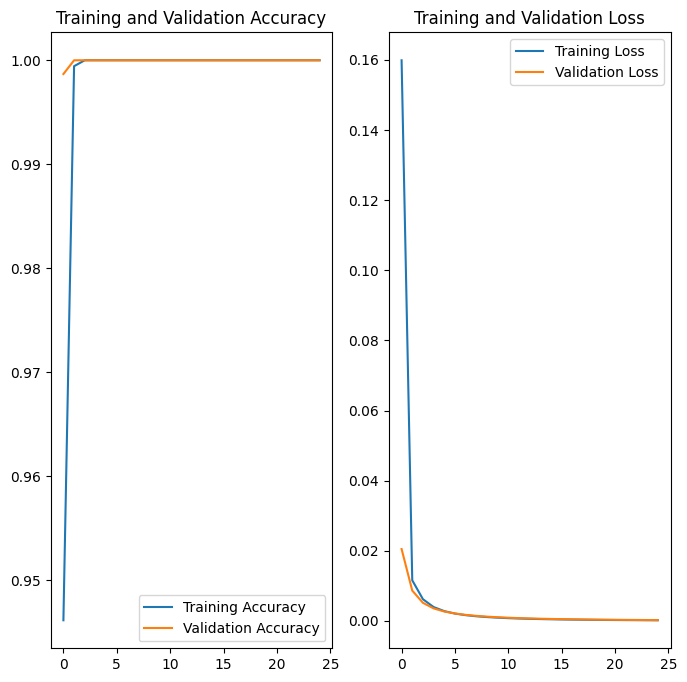

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['rock' 'paper' 'scissors']


In [18]:
image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
print(predicted_class_names)

1/1 [==============================] - 0s 375ms/step
['scissors' 'scissors' 'rock' 'paper' 'rock' 'paper' 'scissors' 'paper'
 'scissors' 'scissors' 'paper' 'paper' 'scissors' 'paper' 'paper' 'paper']


In [19]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1]
Predicted labels:  [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1]


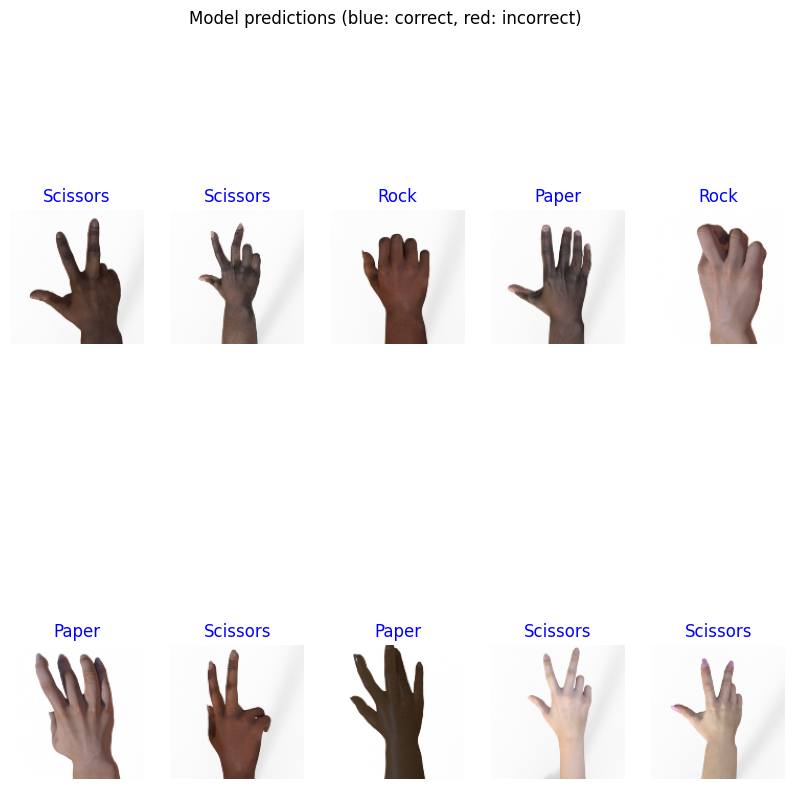

In [21]:
plt.figure(figsize=(10,10))
for n in range(10):
    plt.subplot(2,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

In [22]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,ConfusionMatrixDisplay,classification_report

**Results of the prediction results using a confusion matrix**

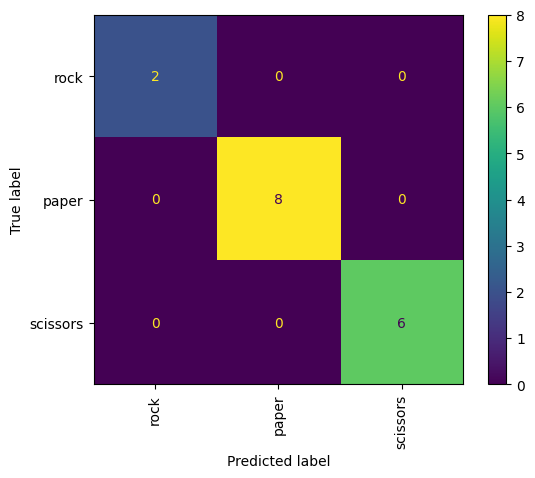

In [23]:
ConfusionMatrixDisplay.from_predictions(label_batch, predicted_ids, display_labels=class_names, xticks_rotation="vertical")
plt.show()